# **Initial Analysis**  
### CIND 820 - Big Data Analytics Project  
### Author: E. Thompson-Becker



Initial Analysis of Shunyi air quality data from 2013-2017   
Preformed on the Shunyi-data.csv file created in the DataPreparation file that has missing values filled in with the value directly above the missing data.  

In [ ]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [ ]:
data = pd.read_csv("Shunyi-data.csv")

In [ ]:
data.head()

,Unnamed: 0,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
1,1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2,2,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
3,3,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6
4,4,2013,3,1,4,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


Print information on the data set: including data types, number of rows, number of coloumns. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   year        35064 non-null  int64  
 2   month       35064 non-null  int64  
 3   day         35064 non-null  int64  
 4   hour        35064 non-null  int64  
 5   PM25        35064 non-null  float64
 6   PM10        35064 non-null  float64
 7   SO2         35064 non-null  float64
 8   NO2         35064 non-null  float64
 9   CO          35064 non-null  float64
 10  O3          35064 non-null  float64
 11  TEMP        35064 non-null  float64
 12  PRES        35064 non-null  float64
 13  DEWP        35064 non-null  float64
 14  RAIN        35064 non-null  float64
 15  wd          35064 non-null  object 
 16  WSPM        35064 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.5+ MB


Descriptive Statistics on raw data, excluding the time data. Wd is a categorical variable and does not show up in the description. 

In [ ]:
#remove year/month/day/hour 
data_ = data.iloc[:,5:17]

#print descriptive statistics
data_.describe().T

,count,mean,std,min,25%,50%,75%,max
PM25,35064.0,80.021067,82.094866,2.0000,20.0,55.0,113.0,941.0000
PM10,35064.0,99.695209,91.819455,2.0000,31.0,77.0,139.0,999.0000
SO2,35064.0,13.454772,19.558488,0.2856,2.0,5.0,16.0,239.0000
NO2,35064.0,44.559199,31.619471,2.0000,20.0,37.0,63.0,258.0000
CO,35064.0,1203.949321,1171.423346,100.0000,400.0,900.0,1600.0,10000.0000
O3,35064.0,53.861652,54.880884,0.2142,9.0,41.0,76.0,351.7164
TEMP,35064.0,13.375589,11.485335,-16.8000,3.0,14.4,23.2,40.6000
PRES,35064.0,1013.072335,10.178110,988.0000,1004.7,1012.8,1021.0,1042.8000
DEWP,35064.0,2.450627,13.732912,-36.0000,-8.9,3.1,15.1,27.5000
RAIN,35064.0,0.061014,0.761119,0.0000,0.0,0.0,0.0,37.3000


## **Univariate Analysis**

Density analysis for each variable. 

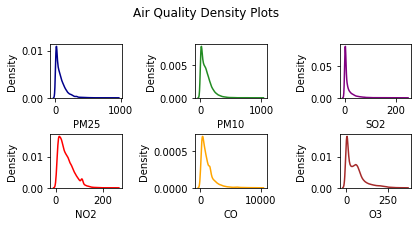

In [ ]:
plt.subplot(3,3,1)
sns.kdeplot(data.PM25, color='darkblue')
plt.subplot(3,3,2)
sns.kdeplot(data.PM10, color ='forestgreen')
plt.subplot(3,3,3)
sns.kdeplot(data.SO2, color='purple')
plt.subplot(3,3,4)
sns.kdeplot(data.NO2, color='red')
plt.subplot(3,3,5)
sns.kdeplot(data.CO, color='orange')
plt.subplot(3,3,6)
sns.kdeplot(data.O3, color = 'brown')

plt.tight_layout(h_pad=1)
plt.suptitle('Air Quality Density Plots')
plt.subplots_adjust(top=0.85)
plt.show()

<function matplotlib.pyplot.show>

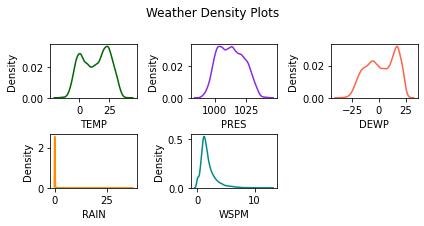

In [ ]:
plt.subplot(3,3,1)
sns.kdeplot(data.TEMP, color ='darkgreen')

plt.subplot(3,3,2)
sns.kdeplot(data.PRES, color='blueviolet')

plt.subplot(3,3,3)
sns.kdeplot(data.DEWP, color='tomato')

plt.subplot(3,3,4)
sns.kdeplot(data.RAIN, color='darkorange')

plt.subplot(3,3,5)
sns.kdeplot(data.WSPM, color='darkcyan')

plt.tight_layout(h_pad=1)
plt.suptitle("Weather Density Plots")
plt.subplots_adjust(top=0.85)
plt.show

Pie chart of the distribution of wind direction data.


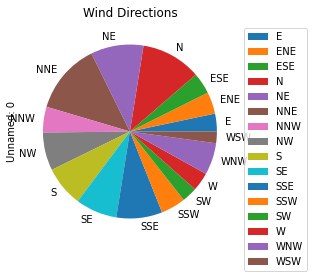

In [ ]:
dir = data.groupby(['wd']).count().plot(kind='pie',y='Unnamed: 0', title='Wind Directions')
sns.move_legend(dir, "upper left", bbox_to_anchor=(1, 1))

## **Bivariate Analysis**

Pair wise distributions between all variables excluding the time variables.

[]

<Figure size 1080x720 with 0 Axes>

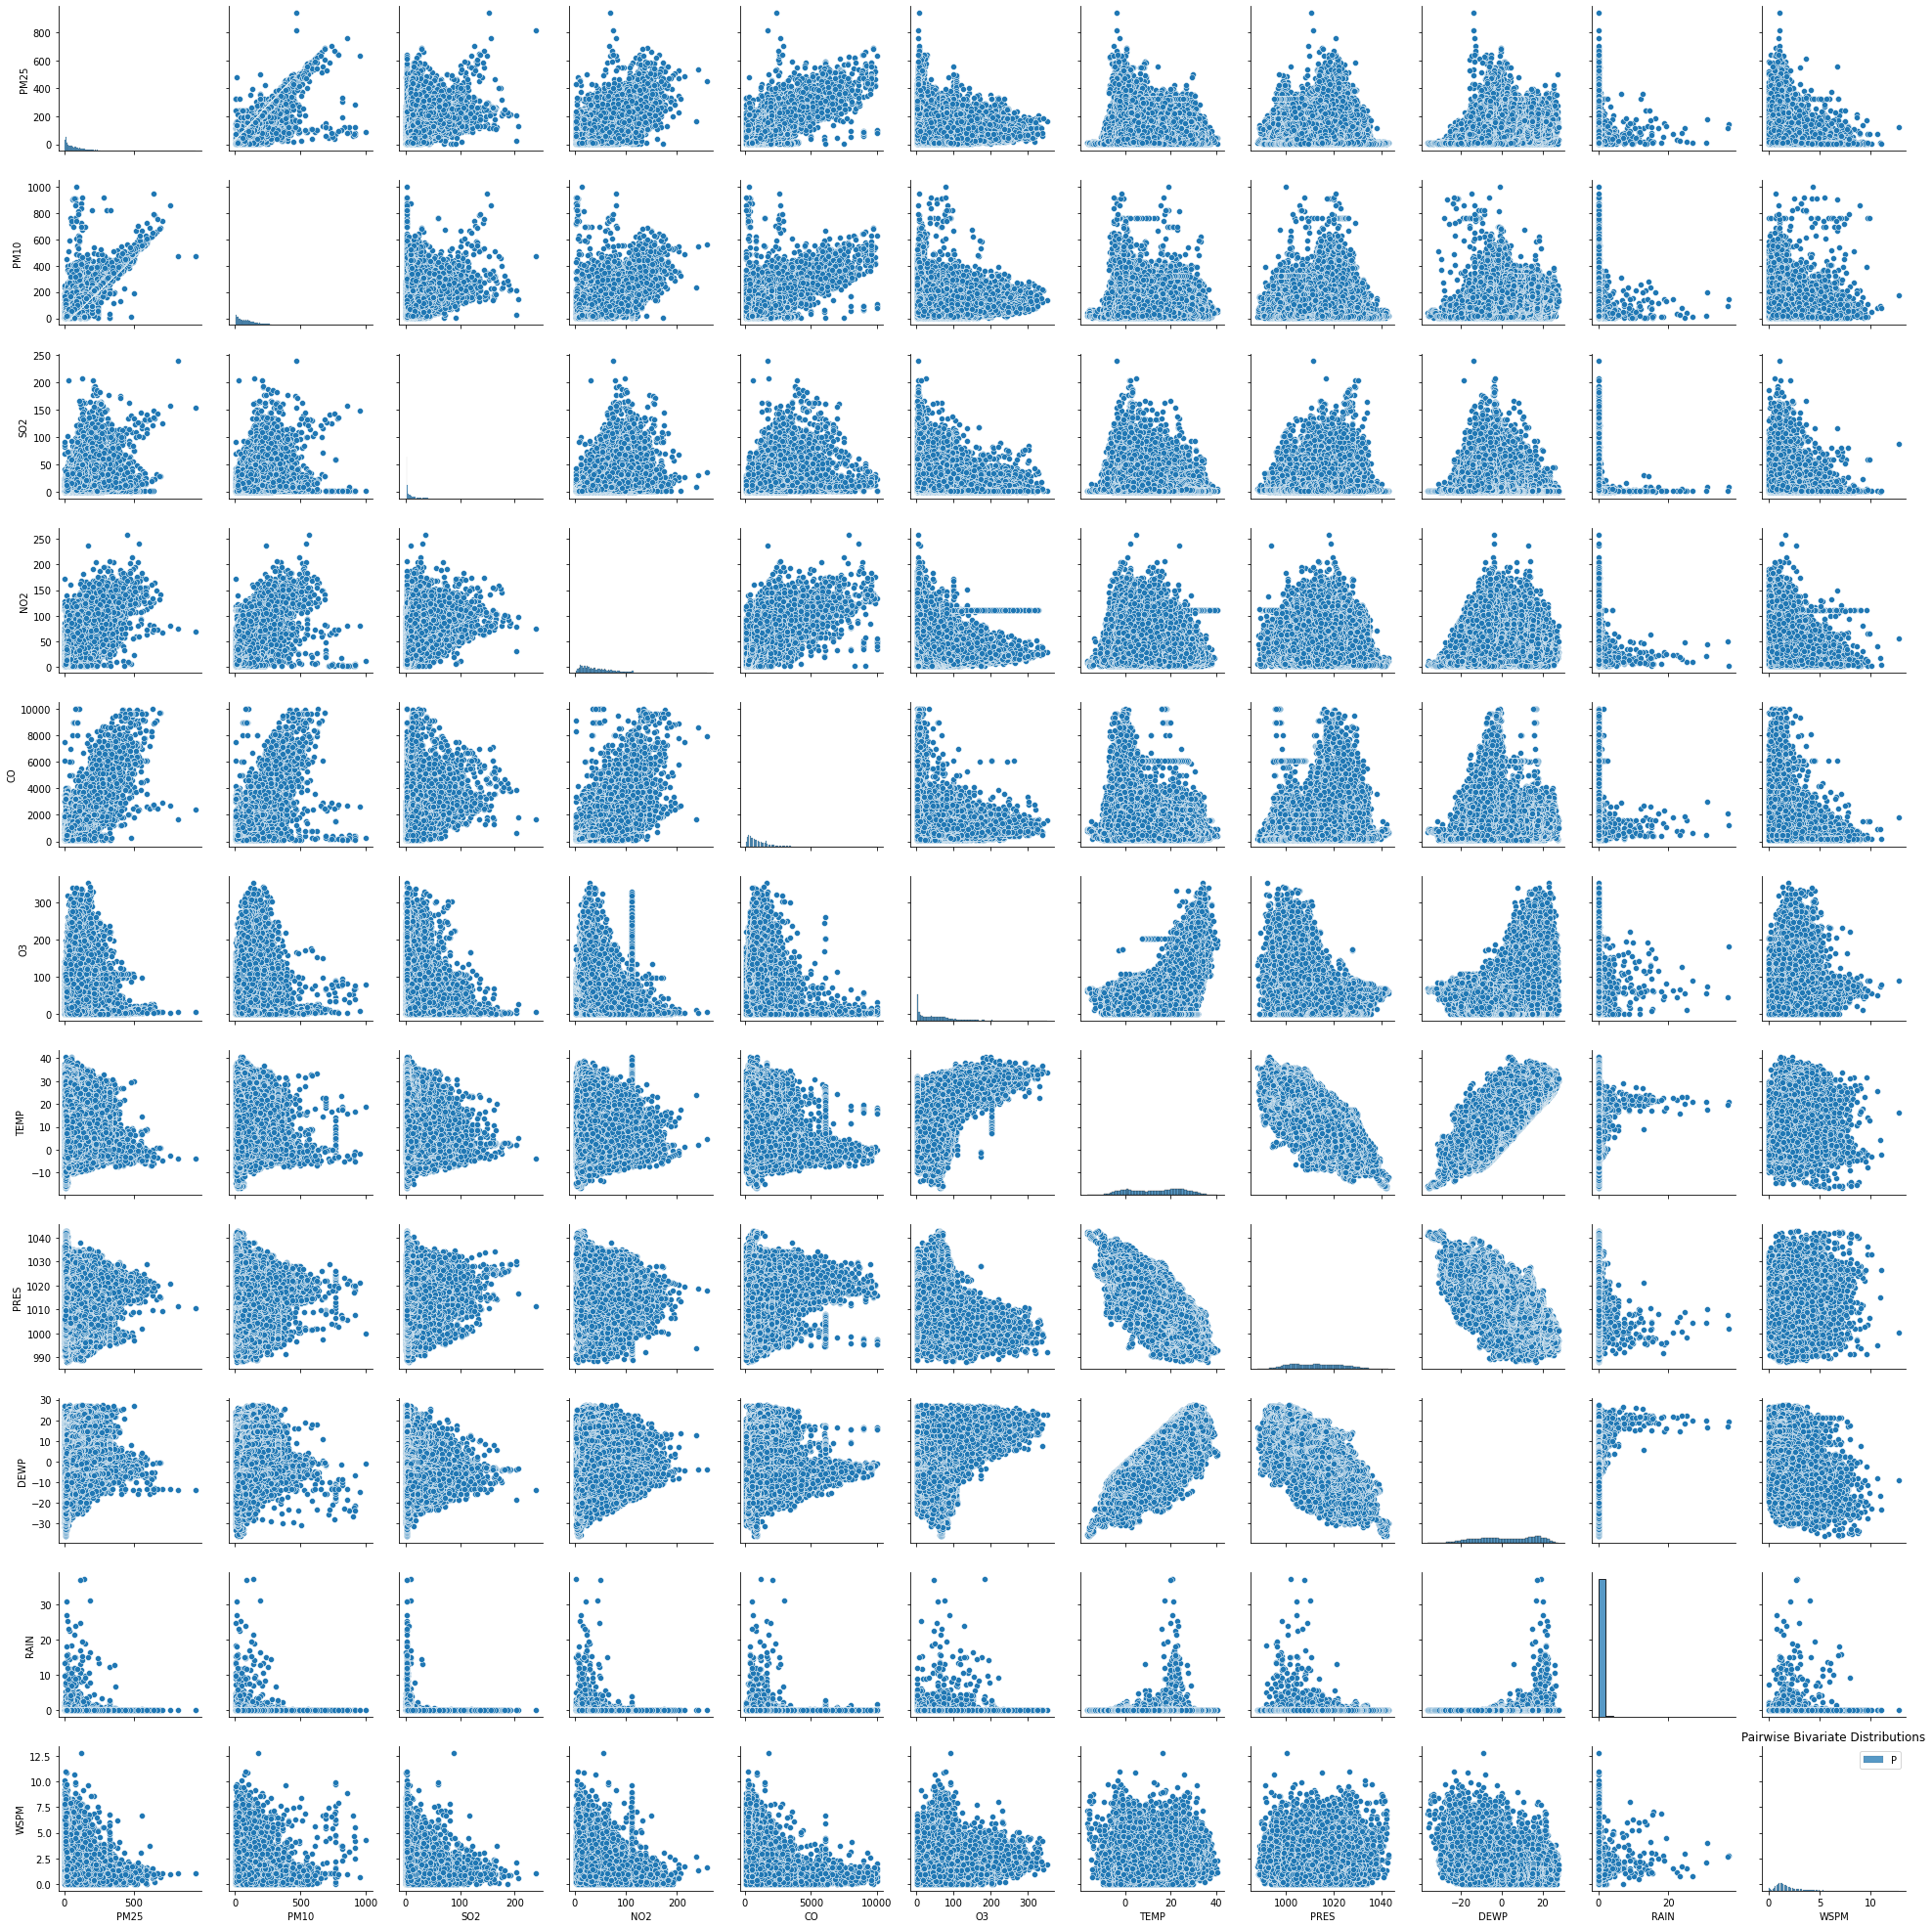

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data_)
plt.title("Pairwise Bivariate Distributions")
plt.legend("PM25")
plt.tight_layout()
plt.plot()

Seasonal boxplots by year and month for each attribute excluding time attributes and wd (wind direction).

Text(0.5, 1.0, 'Month-wise Box Plot\n(PM2.5)')

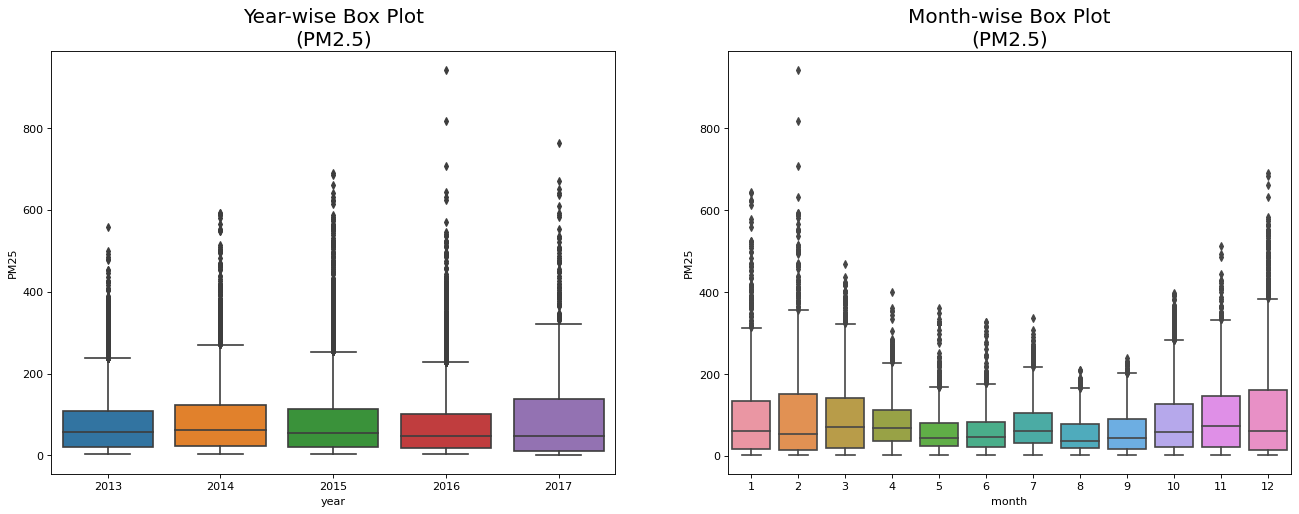

In [ ]:
#Seasonal Boxplot for dependent variable PM2.5
#prep data
years = data['year'].unique()

#prep colours
np.random.seed(100)
mycols = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PM25', data=data, ax=axes[0])
sns.boxplot(x='month', y='PM25', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(PM2.5)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(PM2.5)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(PM10)')

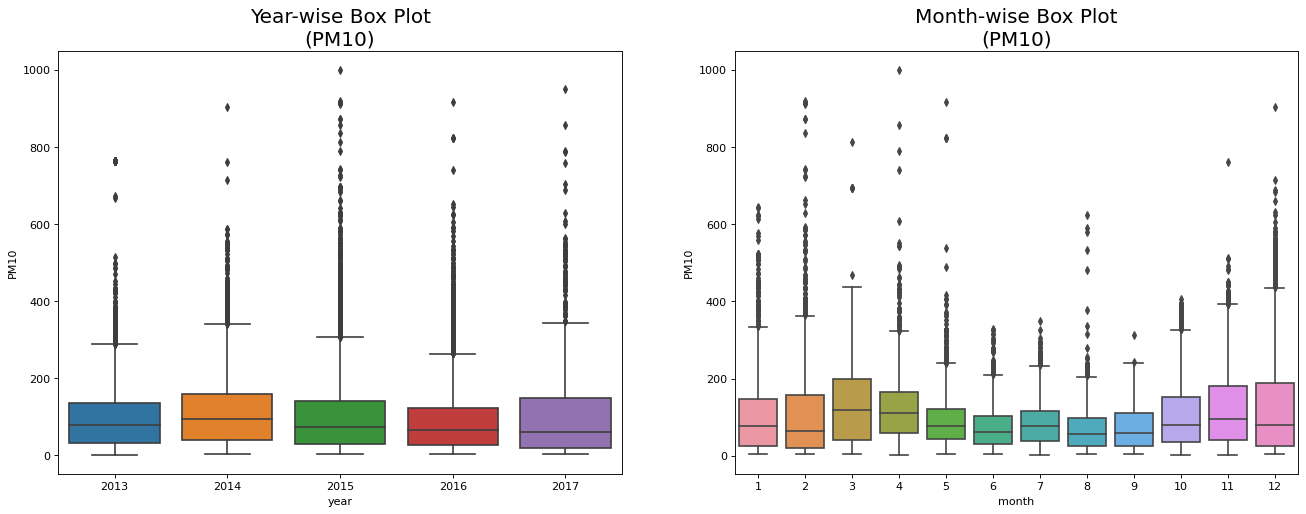

In [ ]:
#Seasonal Boxplot for independent variable PM10
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PM10', data=data, ax=axes[0])
sns.boxplot(x='month', y='PM10', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(PM10)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(PM10)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(SO2)')

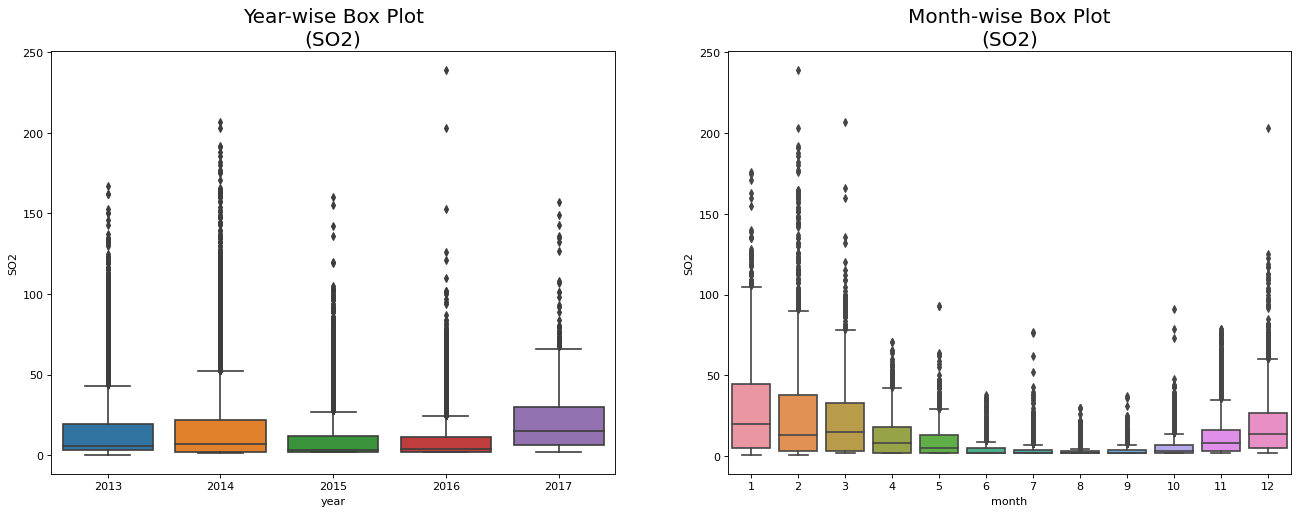

In [ ]:
#Seasonal Boxplot for independent variable SO2
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='SO2', data=data, ax=axes[0])
sns.boxplot(x='month', y='SO2', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(SO2)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(SO2)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(NO2)')

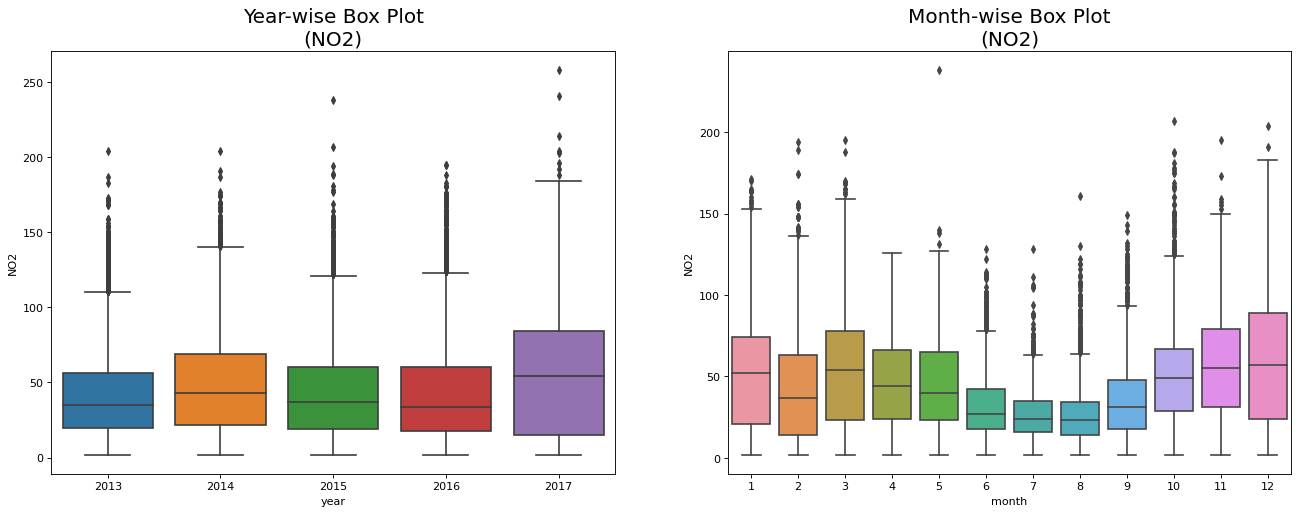

In [ ]:
#Seasonal Boxplot for independent variable NO2
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='NO2', data=data, ax=axes[0])
sns.boxplot(x='month', y='NO2', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(NO2)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(NO2)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(CO)')

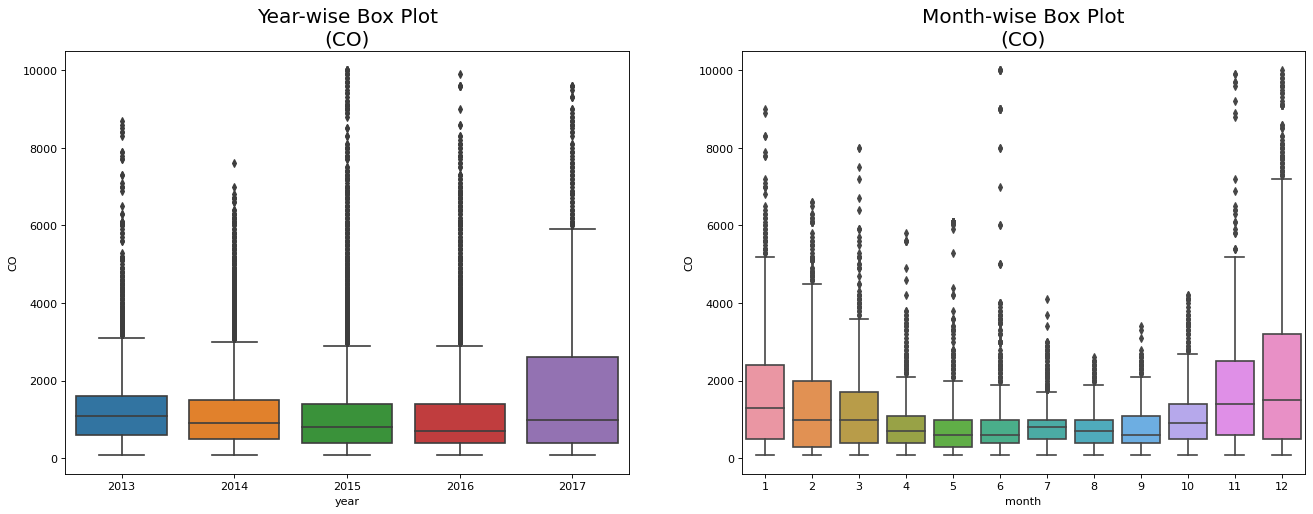

In [ ]:
#Seasonal Boxplot for independent variable CO
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='CO', data=data, ax=axes[0])
sns.boxplot(x='month', y='CO', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(CO)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(CO)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(O3)')

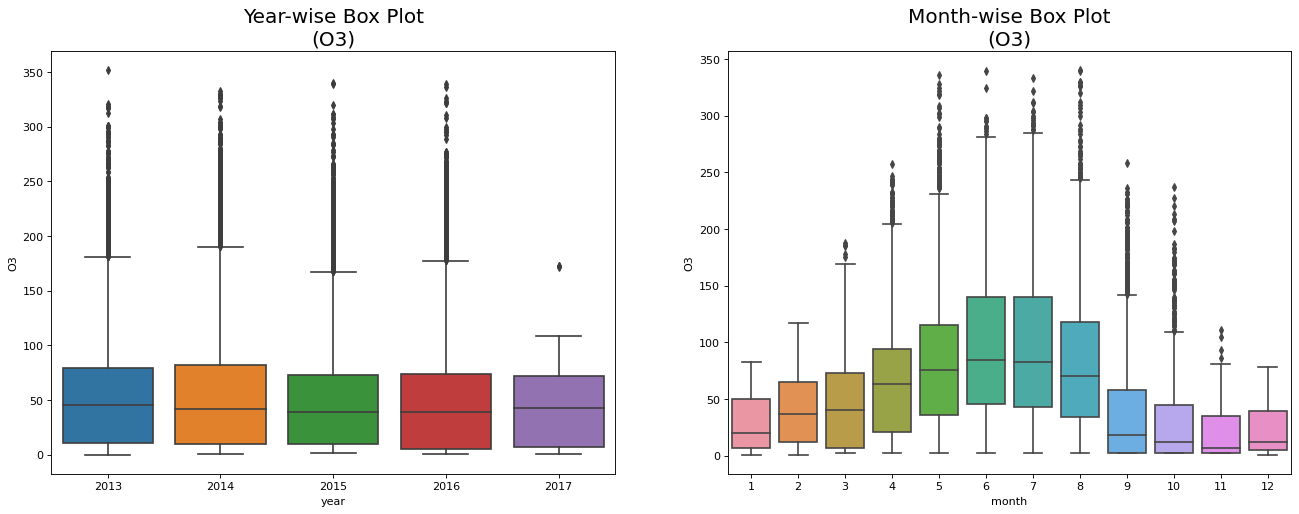

In [ ]:
#Seasonal Boxplot for independent variable O3
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='O3', data=data, ax=axes[0])
sns.boxplot(x='month', y='O3', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(O3)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(O3)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(TEMP)')

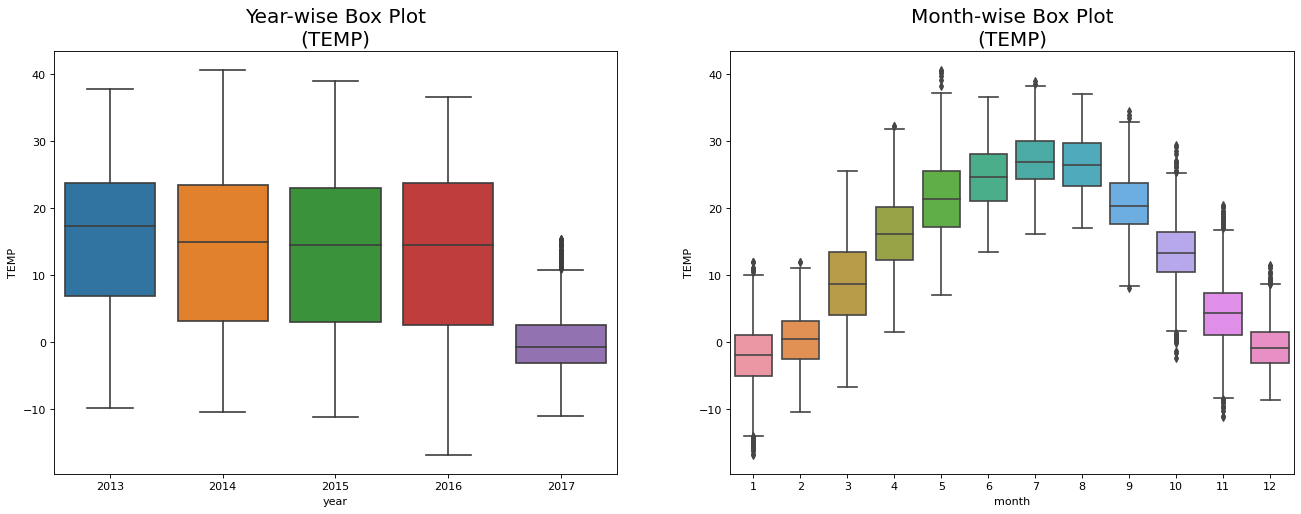

In [ ]:
#Seasonal Boxplot for independent variable TEMP
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='TEMP', data=data, ax=axes[0])
sns.boxplot(x='month', y='TEMP', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(TEMP)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(TEMP)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(PRES)')

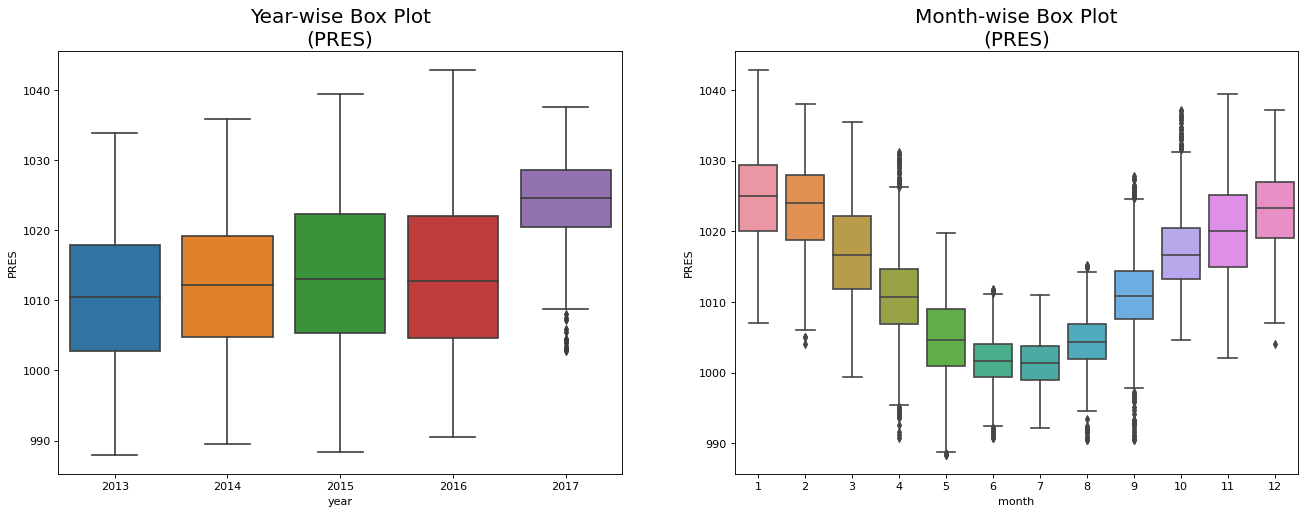

In [ ]:
#Seasonal Boxplot for independent variable PRES
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PRES', data=data, ax=axes[0])
sns.boxplot(x='month', y='PRES', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(PRES)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(PRES)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(DEWP)')

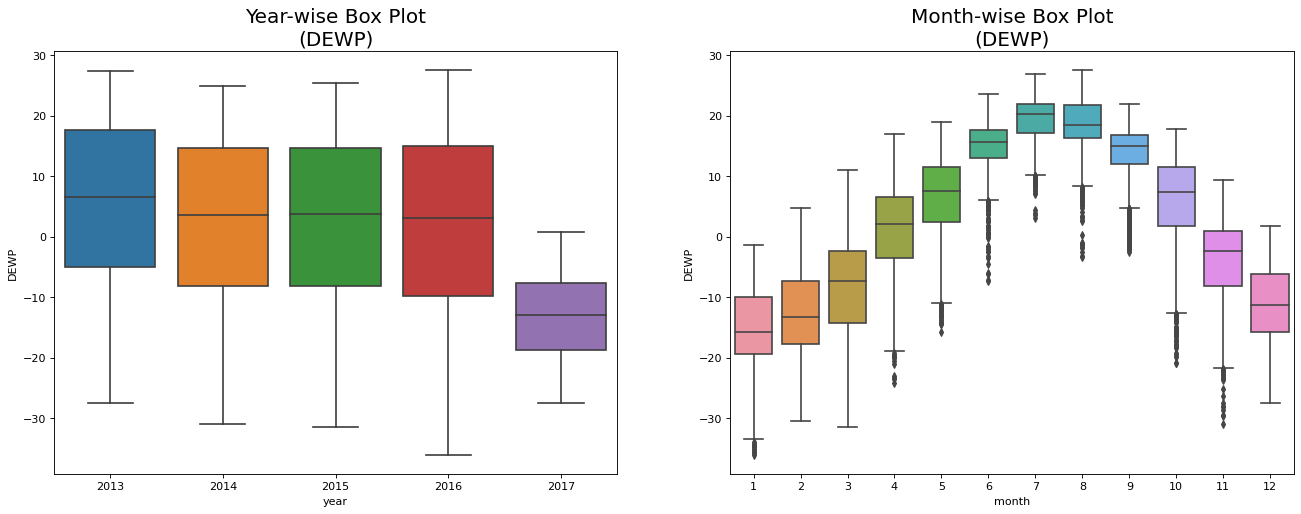

In [ ]:
#Seasonal Boxplot for independent variable DEWP
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='DEWP', data=data, ax=axes[0])
sns.boxplot(x='month', y='DEWP', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(DEWP)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(DEWP)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(RAIN)')

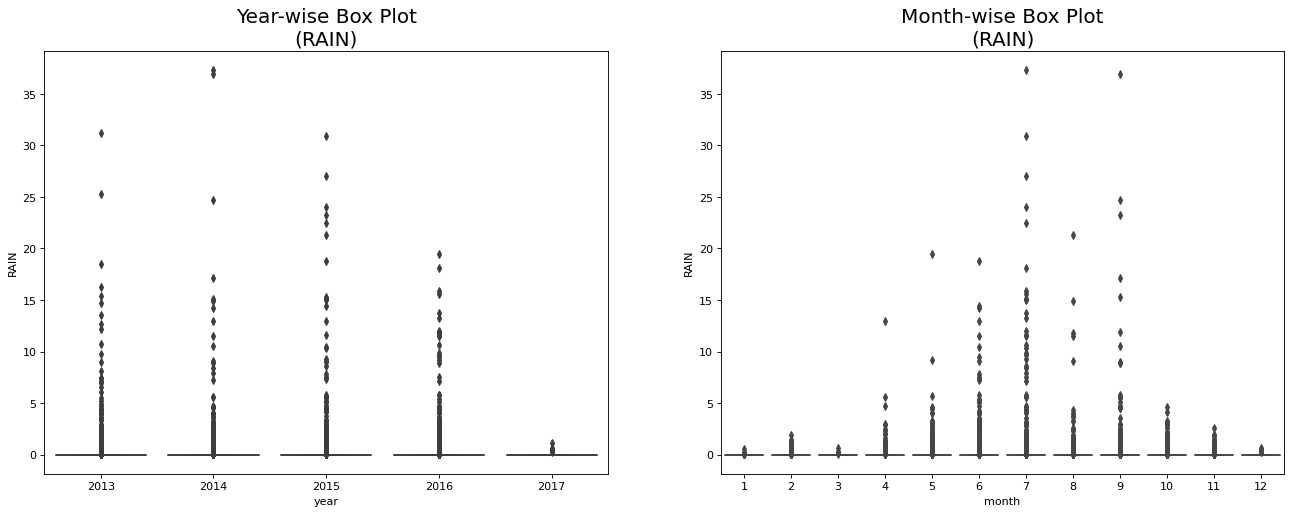

In [ ]:
#Seasonal Boxplot for independent variable RAIN
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='RAIN', data=data, ax=axes[0])
sns.boxplot(x='month', y='RAIN', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(RAIN)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(RAIN)', fontsize=18)

Text(0.5, 1.0, 'Month-wise Box Plot\n(WSPM)')

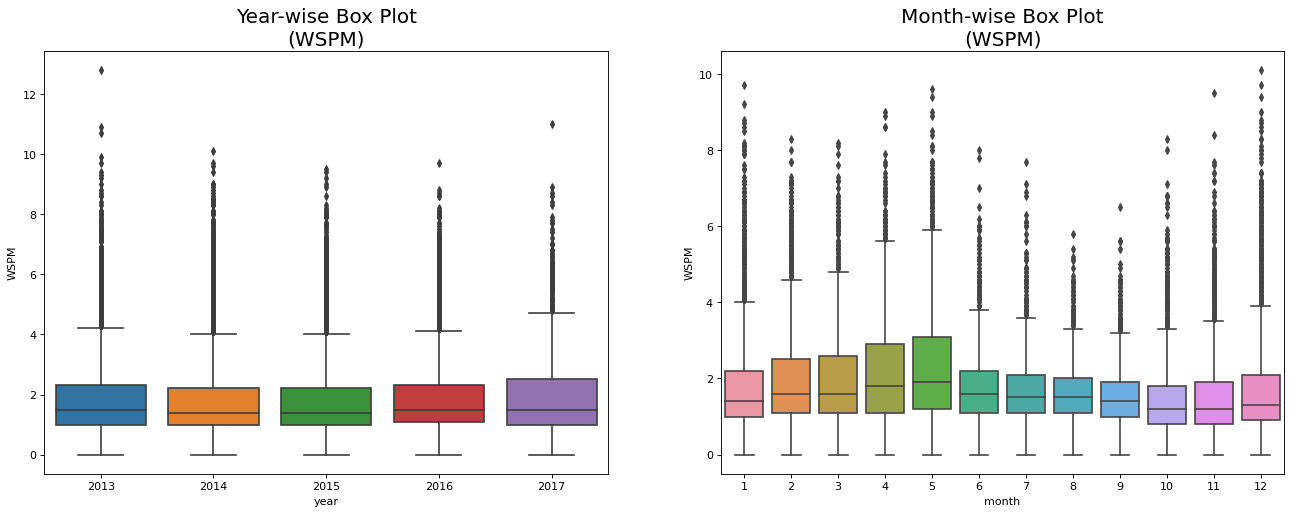

In [ ]:
#Seasonal Boxplot for independent variable WSPM
#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='WSPM', data=data, ax=axes[0])
sns.boxplot(x='month', y='WSPM', data=data.loc[~data.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(WSPM)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(WSPM)', fontsize=18)

Trends by year  
- the year 2017 only contains data from two months and therefore the boxplots for 2017 are not comparable to the other years 



Trends by month   
- O3, temperature, dew point temperature, and rain have higher values in the summer months   
- PM2.5, PM10, SO2, NO2, CO, and pressure have higher values in the winter months  
- wind speed is higher in the spring months but are fairly the same in the other months 

Correlation analysis between all variables excluding the time variables   
- red is positive relation, blue is negative relation
- the lighter the colour the lower the correlation coefficient 

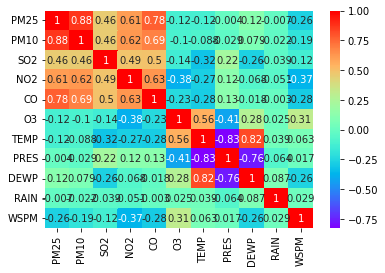

In [ ]:
# calculating a correlation matrix
matrix = data_.corr().round(3)
#print(matrix)

#print correlation matrix as a headmap 
sns.heatmap(matrix, annot=True, cmap="rainbow")
plt.show()

# Feature Selection


In [ ]:
#drop wind direction for numerical analysis
data_sel = data_.drop(['wd'],axis = 1)
#drop the dependent variable from the data
x = data_sel.drop(['PM25'],axis=1)
#check to see if everything is ok 
x

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3
1,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4
2,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6
3,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,6.6
4,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...
35059,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8
35060,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5
35061,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7
35062,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,1.8


In [ ]:
#remove columns with a small variance with a threshold of 80%
thresholder = VarianceThreshold(threshold=0.8)

# create high variance features
X_high_variance = thresholder.fit_transform(x)

In [ ]:
#find the shape after transforming 
X_high_variance.shape

(35064, 9)

In [ ]:
# see the variances
thresholder.variances_

array([8.43057188e+03, 3.82523558e+02, 9.99762439e+02, 1.37219352e+06,
       3.01182549e+03, 1.31909168e+02, 1.03590971e+02, 1.88587491e+02,
       5.79285488e-01, 1.65748793e+00])

In [ ]:
#transform the data to just the selected columns 
selected = thresholder.transform(x)
#convert back into a data frame from an array
selected = pd.DataFrame(selected)

In [ ]:
#print the data frame
selected

,0,1,2,3,4,5,6,7,8
0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,9.3
1,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,9.4
2,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,8.6
3,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,6.6
4,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,4.5
...,...,...,...,...,...,...,...,...,...
35059,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,1.8
35060,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,1.5
35061,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,1.7
35062,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,1.8


From matching the columns to those with labels we can see that the RAIN column was removed. It has a small variance and will not have a large effect on the dependent variable. Combining this will the results from the correlation matrix for Rain, we can confidently remove this column from the data set before preforming the regression analysis. 

